C:\Users\ppak1\AppData\Local\Temp\ipykernel_8452\3287002234.py:30: RuntimeWarning: invalid value encountered in sqrt
  r_values.append(np.sqrt(R**2 - z**2))
C:\Users\ppak1\AppData\Local\Temp\ipykernel_8452\3287002234.py:31: RuntimeWarning: invalid value encountered in sqrt
  r_values_negative.append(-np.sqrt(R**2 - z**2))


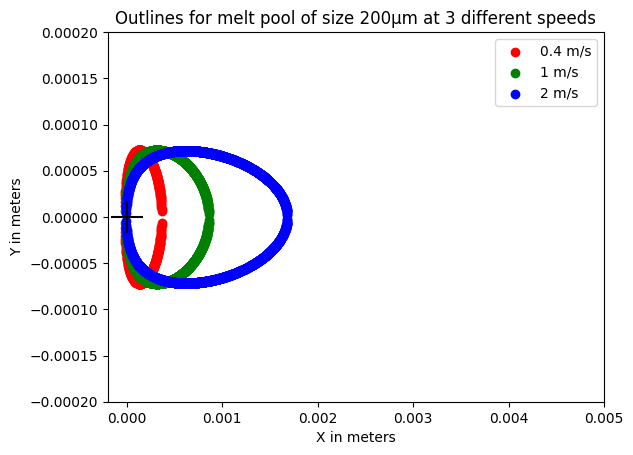

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Inconel 625 alloy properties
epsilon = 0.35            # absorptivity
k = 15                    # thermal_conductivity
rho = 8000                # density
c_p = 450                 # heat_capacity
alpha = k / (rho * c_p)   # thermal_diffusivity
t_delta = 1703 - 293.15         # temperature melting - temperature initial

def rosenthal(R, v, p):
    return R + (((2*alpha)/v) * np.log((2 * np.pi * k * R * t_delta)/(epsilon * p)))

color_values = ["r", "g", "b"]
v_values = [0.4, 1, 2]                  # velocities
p_values = [138.558, 325.977, 638.341]  # powers

plt.axis([-200 * 10 ** -6, 0.005, -200 * 10 ** -6, 200 * 10 ** -6])
R_values = np.arange(10**-6, 0.00469, 10**-6)

for index, velocity in enumerate(v_values):
    r_values = []
    r_values_negative = []
    z_values = []

    for R in R_values:
        z = rosenthal(R, velocity, p_values[index])
        z_values.append(z)
        r_values.append(np.sqrt(R**2 - z**2))
        r_values_negative.append(-np.sqrt(R**2 - z**2))

    plt.scatter(z_values, r_values, c=color_values[index], label=f"{velocity} m/s")
    plt.scatter(z_values, r_values_negative, c=color_values[index])

plt.title(f"Outlines for melt pool of size 200μm at 3 different speeds")
plt.xlabel("X in meters")
plt.ylabel("Y in meters")
plt.legend()

# Plots + at origin.
plt.scatter(0, 0, marker="+", s=500, c="black")

plt.show()


In [2]:
from scipy.optimize import fsolve

def rosenthal_front_400mm(z):
    return 2*z + (2*alpha/v_values[0]) * np.log((2 * np.pi * k * np.absolute(z) * t_delta)/(epsilon * p_values[0]))

def rosenthal_front_1000mm(z):
    return 2*z + (2*alpha/v_values[1]) * np.log((2 * np.pi * k * np.absolute(z) * t_delta)/(epsilon * p_values[1]))

def rosenthal_front_2000mm(z):
    return 2*z + (2*alpha/v_values[2]) * np.log((2 * np.pi * k * np.absolute(z) * t_delta)/(epsilon * p_values[2]))

print(fsolve(rosenthal_front_400mm, 1))
print(fsolve(rosenthal_front_1000mm, 1))
print(fsolve(rosenthal_front_2000mm, 1))


[2.70900521e-05]
[1.64733549e-05]
[1.05626483e-05]
